In [1]:
# UNAD
## Peter Enrique Mojica Medina
## Agrupamiento en hierarchical clustering

In [23]:
## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [83]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [85]:
# Cargar el conjunto de datos en la variable Datos
Datos = pd.read_csv('Mall_Customers.csv')

In [87]:
Datos.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [89]:
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [91]:
# Obtener información sobre el tipo de datos y el total de valores en cada columna
print(Datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

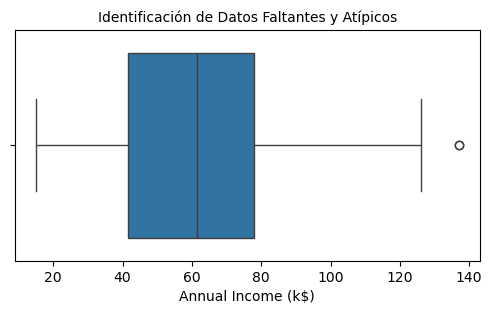

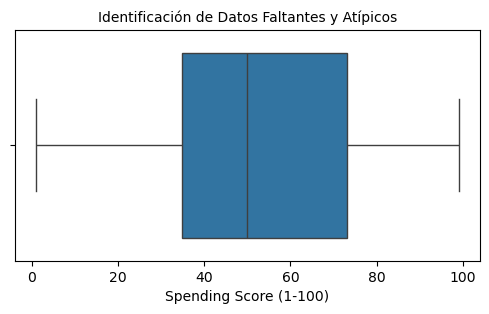

In [93]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [94]:
## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [97]:
# Identificar columnas con datos faltantes
print(Datos.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [99]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['Age']=Datos['Age'].replace(0,Datos['Age'].mean())
Datos['Annual Income (k$)']=Datos['Annual Income (k$)'].replace(0,Datos['Annual Income (k$)'].mean())
Datos['Spending Score (1-100)']=Datos['Spending Score (1-100)'].replace(0,Datos['Spending Score (1-100)'].mean())

In [101]:
#Conteo de Datos Atípicos

minScore=0
maxScore=100
Total_Atipicos=((Datos['Spending Score (1-100)']<minScore)|(Datos['Spending Score (1-100)']>maxScore)).sum()
print("El total de datos atípicos es {}{}".format(Total_Atipicos,"\n"))

# Filtra Datos Atípicos

Datos=Datos[(Datos['Spending Score (1-100)']<maxScore)&(Datos['Spending Score (1-100)']>minScore)]

Datos.info()

El total de datos atípicos es 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [103]:
## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [105]:
# Caracteristicas de interes para el agrupamiento: Edad, Ingresos anuales, Puntacion de gastos

In [107]:
# Filtrar columnas del modelo 

Datos1 = Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]
Datos1.head(20)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


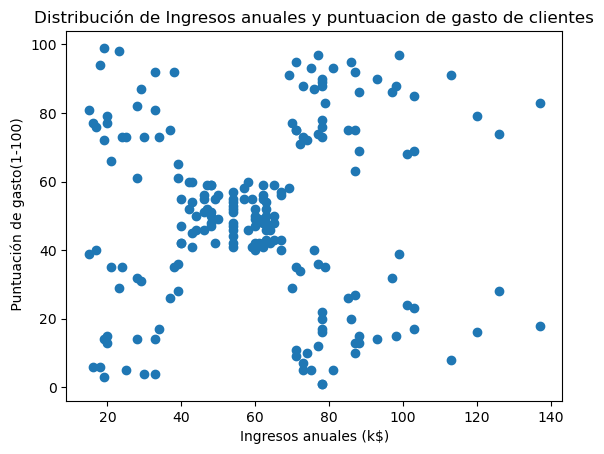

In [127]:
# Grafica antes del agrupamiento

plt.scatter(Datos1['Annual Income (k$)'], Datos1['Spending Score (1-100)'])
plt.xlabel('Ingresos anuales (k$)')
plt.ylabel(' Puntuación de gasto(1-100)')
plt.title('Distribución de Ingresos anuales y puntuacion de gasto de clientes')
plt.show()

In [111]:
## 4. Entrenar el modelo configurando los diferentes hiperparámetros

In [129]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

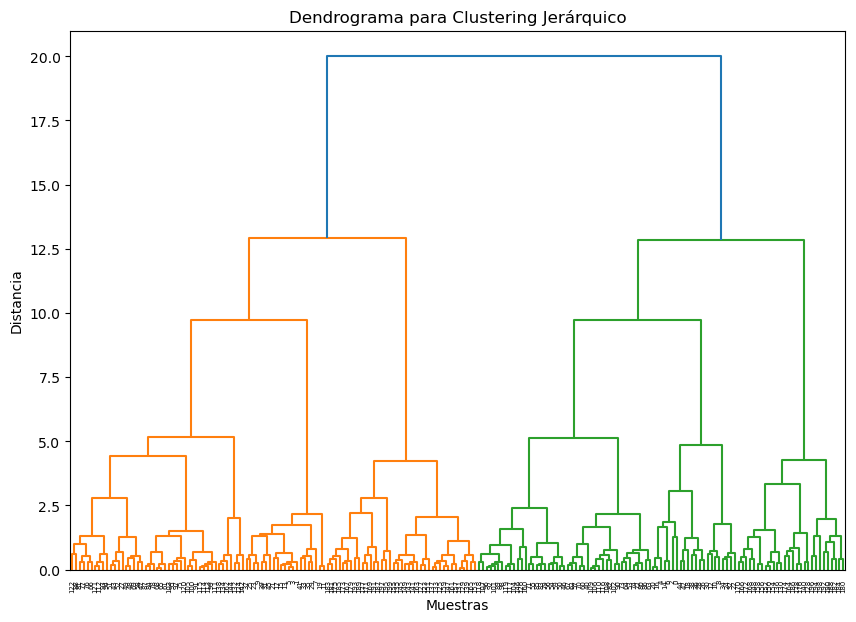

In [115]:
# Check for and handle non-finite values in scaled_data
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

In [116]:
## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [117]:
# Assuming 'Datos' is your DataFrame
# Replace NaNs with the mean of each column
Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].fillna(Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", ch_score],
    ["Indice Davies Bouldin", db_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
|  Coeficiente Silhouette  | 0.32148866683112387 |
| Indice Calinski Harabasz |  88.10174149244529  |
|  Indice Davies Bouldin   | 1.1277290061047862  |
+--------------------------+---------------------+


In [121]:
## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

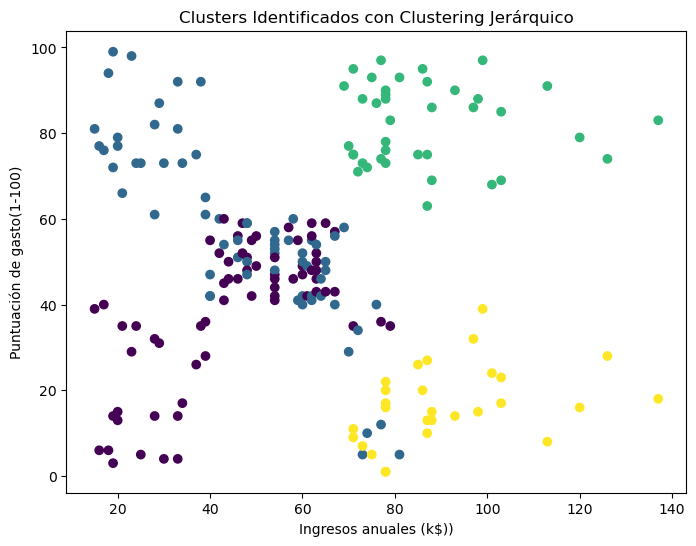

In [135]:
# Gráfico de Dispersión para Visualización de Clusters
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
Datos1['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], c=Datos['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Ingresos anuales (k$))')
plt.ylabel('Puntuación de gasto(1-100)')
plt.show()

Silhouette Score: 0.3614512741691407


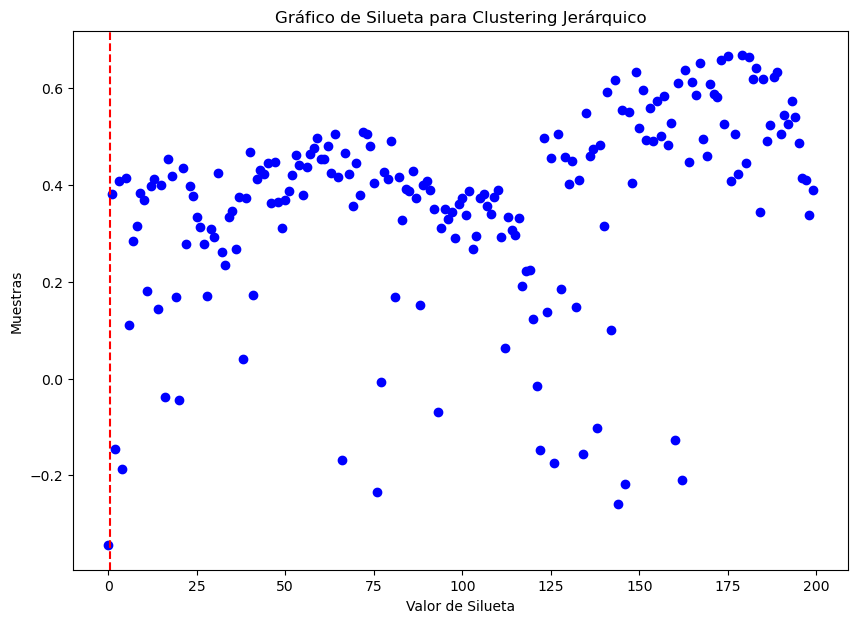

In [137]:
# Gráfico de Silueta
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()